In [1]:
# Import Library

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Tarik data dari drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ambil Data 

import zipfile,os
local_zip = '/content/drive/MyDrive/File_Data /images_fruit.zip' # Masukan File 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

train_dir = 'images' # Nama File

In [4]:
train_datagen = ImageDataGenerator(
                    brightness_range = (0.5, 1.5),
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2 # Jika hanya ada 1 database maka harus di spilt menjadi 2: training dan validation
                    )

In [5]:
# Data training
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical',
        subset='training')

Found 288 images belonging to 9 classes.


In [6]:
# Data Validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 71 images belonging to 9 classes.


In [7]:
# Buat Model nya

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # Samakan dengan target size
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
#    tf.keras.layers.Dropout(.1, input_shape=(2,)), # Dropout Layer untuk menghilangkan overfitting data
    tf.keras.layers.Dense(9, activation='softmax') # Banyaknya classes
])

In [8]:
# Kompilasi modelnya

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
# Ringkasan model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
# Menguji Model

history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs= 50 # Banyaknya langkah pengujian
) 

Epoch 1/50
9/9 [==============================] - 36s 2s/step - loss: 2.2554 - accuracy: 0.1215 - val_loss: 2.1742 - val_accuracy: 0.1127
Epoch 2/50
9/9 [==============================] - 21s 3s/step - loss: 2.1467 - accuracy: 0.1354 - val_loss: 2.0395 - val_accuracy: 0.2676
Epoch 3/50
9/9 [==============================] - 19s 2s/step - loss: 1.8836 - accuracy: 0.2500 - val_loss: 1.6700 - val_accuracy: 0.4225
Epoch 4/50
9/9 [==============================] - 22s 3s/step - loss: 1.6149 - accuracy: 0.3785 - val_loss: 1.4717 - val_accuracy: 0.5211
Epoch 5/50
9/9 [==============================] - 20s 2s/step - loss: 1.4226 - accuracy: 0.4167 - val_loss: 1.5240 - val_accuracy: 0.4085
Epoch 6/50
9/9 [==============================] - 22s 2s/step - loss: 1.3687 - accuracy: 0.5069 - val_loss: 1.2360 - val_accuracy: 0.5493
Epoch 7/50
9/9 [==============================] - 20s 2s/step - loss: 1.2586 - accuracy: 0.5312 - val_loss: 1.2986 - val_accuracy: 0.5915
Epoch 8/50
9/9 [==================

In [11]:
# Fungsi membuat grafik

def make_plot(train, validation, title, legend1, legend2):
  graph = plt.plot(history.history[train])
  graph = plt.plot(history.history[validation])
  graph = plt.title(title)
  graph = plt.legend([legend1, legend2])
  graph = plt.show()
  return graph

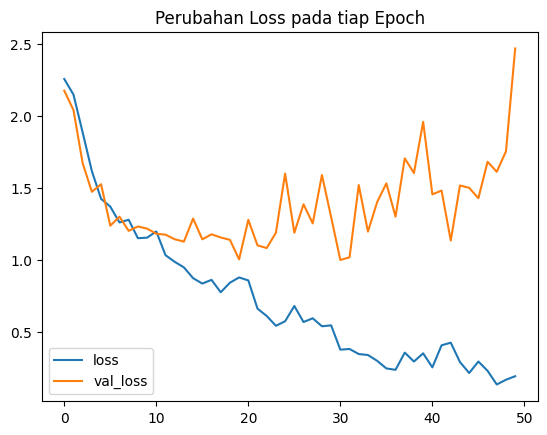

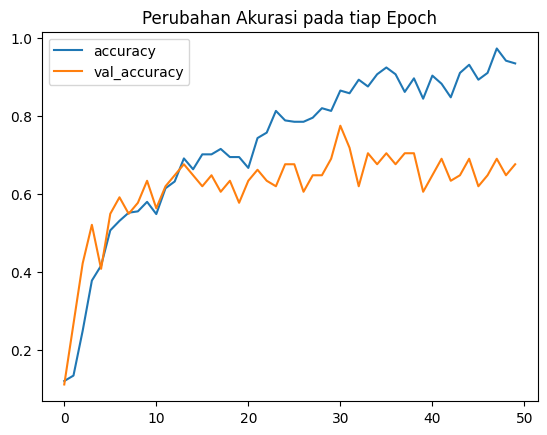

In [12]:
# Membuat Grafik akurasi dan loss

make_plot('loss', 'val_loss', 'Perubahan Loss pada tiap Epoch', 'loss', 'val_loss')
make_plot('accuracy', 'val_accuracy', "Perubahan Akurasi pada tiap Epoch", 'accuracy', 'val_accuracy')

Saving Image_7.jpg to Image_7 (2).jpg
1/1 [==============================] - 0s 269ms/step
Image_7.jpg
banana fruit


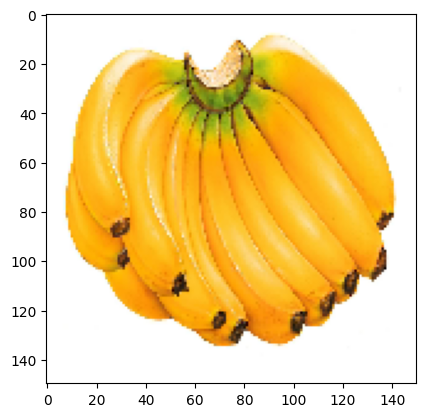

In [17]:
import numpy as np
from google.colab import files
#from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('apple fruit')
  elif classes[0,1]!=0:
    print('banana fruit')
  elif classes[0,2]!=0:
    print('cherry fruit')
  elif classes[0,3]!=0:
    print('chickoo fruit')
  elif classes[0,4]!=0:
    print('grapes fruit')
  elif classes[0,5]!=0:
    print('kiwi fruit')
  elif classes[0,6]!=0:
    print('mango fruit')
  elif classes[0,7]!=0:
    print('orange fruit')
  else:
    print('strawberry fruit')